In [1]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import numpy as np

In [2]:
import sys
sys.path.append('../programming_scripts/')

from MS2LDA_core import run_lda
from MS2LDA_core import predict_with_lda

from SMART_annotation import annotate_motifs

C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\sparsestack\StackedSparseArray.py:4: DeprecationWarning: Please use `get_index_dtype` from the `scipy.sparse` namespace, the `scipy.sparse.sputils` namespace is deprecated.
  from scipy.sparse.sputils import get_index_dtype


In [3]:
spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-COLLECTIONS-PESTICIDES-POSITIVE.mgf"

In [4]:
lda_model, corpus, id2word = run_lda(spectra_path=spectra_path, num_motifs=66)

In [5]:
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1     -0.216995 -0.095389       1        1  3.510578
16    -0.204701 -0.009986       2        1  3.023399
34    -0.042238 -0.109003       3        1  2.627972
45    -0.040075  0.169123       4        1  2.608830
57     0.018663 -0.015037       5        1  2.510902
...         ...       ...     ...      ...       ...
24     0.055296 -0.030880      62        1  0.842365
8     -0.102797 -0.048658      63        1  0.716185
6     -0.233069 -0.011900      64        1  0.715484
58    -0.058929 -0.013384      65        1  0.710412
23     0.055021 -0.050939      66        1  0.649761

[66 rows x 5 columns], topic_info=         Term         Freq        Total Category  logprob  loglift
3944   70.04+  3835.000000  3835.000000  Default  30.0000  30.0000
61     72.04+  2832.000000  2832.000000  Default  29.0000  29.0000
2599  158.98+  2133.000000  2133.000000  Default  28.0000  28.0000
513   125.02+  2252.000000  2252.000000  Default  27.0000  27.0000
141   127.02+  1463.000000  1463.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
9271  272.16+    20.194551   217.184045  Topic66  -4.6702   2.6610
3131  170.05+    16.044528   202.968718  Topic66  -4.9003   2.4986
92    119.09+    20.308594   745.646117  Topic66  -4.6646   1.4331
97    147.08+    15.641872   232.437573  Topic66  -4.9257   2.3377
937   105.04+    17.261411   519.423444  Topic66  -4.8272   1.6321

[3738 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4318      5  0.198677    0.03
4318     13  0.011038    0.03
4318     18  0.706406    0.03
4318     20  0.044150    0.03
4318     53  0.011038    0.03
...     ...       ...     ...
1672     49  0.003758  99.09+
1672     54  0.206717  99.09+
1672     63  0.030068  99.09+
1672     66  0.018792  99.09+
1116     58  0.728400   99.11

[13857 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 17, 35, 46, 58, 49, 62, 5, 41, 60, 65, 32, 52, 6, 15, 28, 39, 30, 4, 11, 29, 33, 16, 63, 61, 26, 21, 51, 3, 20, 47, 42, 19, 43, 55, 50, 23, 66, 1, 34, 56, 10, 13, 40, 12, 38, 22, 48, 64, 31, 37, 57, 14, 53, 36, 44, 27, 18, 45, 54, 8, 25, 9, 7, 59, 24])

In [6]:
smiles_per_motifs, predicted_motifs = predict_with_lda(lda_model, spectra_path, id2word)

66


In [7]:
annotated_motifs = []
purities_maccs = []
for smiles_per_motif in smiles_per_motifs:
    annotated_motif, purity_maccs = annotate_motifs(smiles_per_motif)
    annotated_motifs.append(annotated_motif)
    purities_maccs.append(purity_maccs)

In [8]:
for motif_number, purity_maccs in enumerate(purities_maccs):
    purity_maccs_nan = purity_maccs.copy()
    purity_maccs_nan[purity_maccs_nan == 0] = np.nan
    print(motif_number, len(smiles_per_motifs[motif_number]),len(annotated_motifs[motif_number]), np.nanmean(purity_maccs_nan))

0 6 16 0.452599388379205
1 6 23 0.5528846153846154
2 8 20 0.5458333333333333
3 6 21 0.4283333333333333
4 5 4 0.47818181818181815
5 9 7 0.4275555555555555
6 6 13 0.45333333333333337
7 4 7 0.4427083333333333
8 4 12 0.534375
9 7 15 0.44387755102040816
10 5 8 0.4767676767676768
11 7 9 0.4329004329004328
12 5 6 0.42439024390243907
13 8 12 0.3695652173913043
14 10 13 0.4418367346938775
15 9 15 0.38888888888888895
16 11 10 0.42368640533778146
17 9 13 0.43847072879330945
18 9 13 0.4158415841584158
19 11 8 0.34965034965034963
20 10 6 0.3504201680672269
21 7 11 0.4493758668515949
22 8 8 0.3869047619047619
23 6 10 0.41385767790262173
24 9 6 0.465359477124183
25 9 4 0.4051627384960719
26 8 9 0.4236842105263158
27 11 32 0.5246038365304421
28 12 10 0.3952991452991453
29 9 7 0.4434434434434434
30 9 6 0.39036381514257623
31 16 16 0.39002403846153844
32 11 12 0.3652453740949315
33 8 4 0.36486486486486486
34 22 12 0.34265734265734277
35 5 3 0.4752475247524751
36 11 9 0.374274661508704
37 6 16 0.43790849

In [9]:
motif_number = 45

In [10]:
len(annotated_motifs[motif_number])

30

In [11]:
annotated_motifs[motif_number]

['[#7]~[#7]',
 'c:n',
 '[#6]~[#6](~[#6])(~[#6])~*',
 '*!@[#7]@*',
 '[#7]~*~[#7]',
 '[#7]~*~*~[#7]',
 '[#7]~*~*~*~[#7]',
 '[!#6;!#1]1~*~*~*~*~1',
 '[F,Cl,Br,I]!@*@*',
 '[!#6;!#1]~[#7]',
 '*1~*~*~*~*~1',
 'Cl',
 '[F,Cl,Br,I]~*(~*)~*',
 '*~*(~*)(~*)~*',
 '[!#6;R]',
 '[#7;R]',
 '*~[#7](~*)~*',
 '[!#6;!#1]~[!#6;!#1]',
 '?',
 '[F,Cl,Br,I]',
 '[!C;!c;R]',
 '[#7]',
 '*~[!#6;!#1](~*)~*',
 '[#7]~*(~*)~*',
 '[#6]-[#7]',
 '[C;H3,H4]',
 '[#7]',
 'a',
 '*1~*~*~*~*~*~1',
 '[R]']

In [12]:
len(smiles_per_motifs[motif_number])

26

In [13]:
smiles_per_motifs[motif_number]

['CC(C)NC1=NC(=NC(=N1)SC)NC(C)C',
 'CCCCC(CN1C=NC=N1)(C#N)C2=CC=C(C=C2)Cl',
 'CC1(CCC(=CC2=CC=C(C=C2)Cl)C1(CN3C=NC=N3)O)C',
 'CC(C)(C)C(CCC1=CC=C(C=C1)Cl)(CN2C=NC=N2)O',
 'CCOC(=O)CCN(C(C)C)SN(C)C(=O)OC1=CC=CC2=C1OC(C2)(C)C',
 'CCCCC(CN1C=NC=N1)(C2=C(C=C(C=C2)Cl)Cl)O',
 'CC(C)(C)C(C(N1C=NC=N1)OC2=CC=C(C=C2)C3=CC=CC=C3)O',
 'CC1(CCC(C1(CN2C=NC=N2)O)CC3=CC=C(C=C3)Cl)C',
 'CC(C)(C)C(C(=CC1=C(C=C(C=C1)Cl)Cl)N2C=NC=N2)O',
 'CC(C)C1CCC(C1(CN2C=NC=N2)O)CC3=CC=C(C=C3)Cl',
 'C1=CC2=C(C=C1F)C(=O)N(C(=N2)N3C=NC=N3)C4=C(C=C(C=C4)Cl)Cl',
 'CC1(CCC(=CC2=CC=C(C=C2)Cl)C1(CN3C=NC=N3)O)C',
 'C1=CC=C(C=C1)C(CCC2=CC=C(C=C2)Cl)(CN3C=NC=N3)C#N',
 'CC(C)(C)C(CCC1=CC=C(C=C1)Cl)(CN2C=NC=N2)O',
 'CCCCC(CN1C=NC=N1)(C2=C(C=C(C=C2)Cl)Cl)O',
 'CCCC(CN1C=NC=N1)C2=C(C=C(C=C2)Cl)Cl',
 'CC(C)(C)C(C(N1C=NC=N1)OC2=CC=C(C=C2)C3=CC=CC=C3)O',
 'CC1(CCC(C1(CN2C=NC=N2)O)CC3=CC=C(C=C3)Cl)C',
 'CC(C)(C)C(C(=CC1=C(C=C(C=C1)Cl)Cl)N2C=NC=N2)O',
 'CCCCC(CN1C=NC=N1)(C#N)C2=CC=C(C=C2)Cl',
 'CCOC(=O)OC1=C(C(=O)N[C@@]12CC[C@@H](CC2)OC)

In [14]:
from rdkit.Chem import Draw
from rdkit import Chem

In [15]:
mol_per_motif = [Chem.MolFromSmiles(smiles) for smiles in smiles_per_motifs[motif_number]]

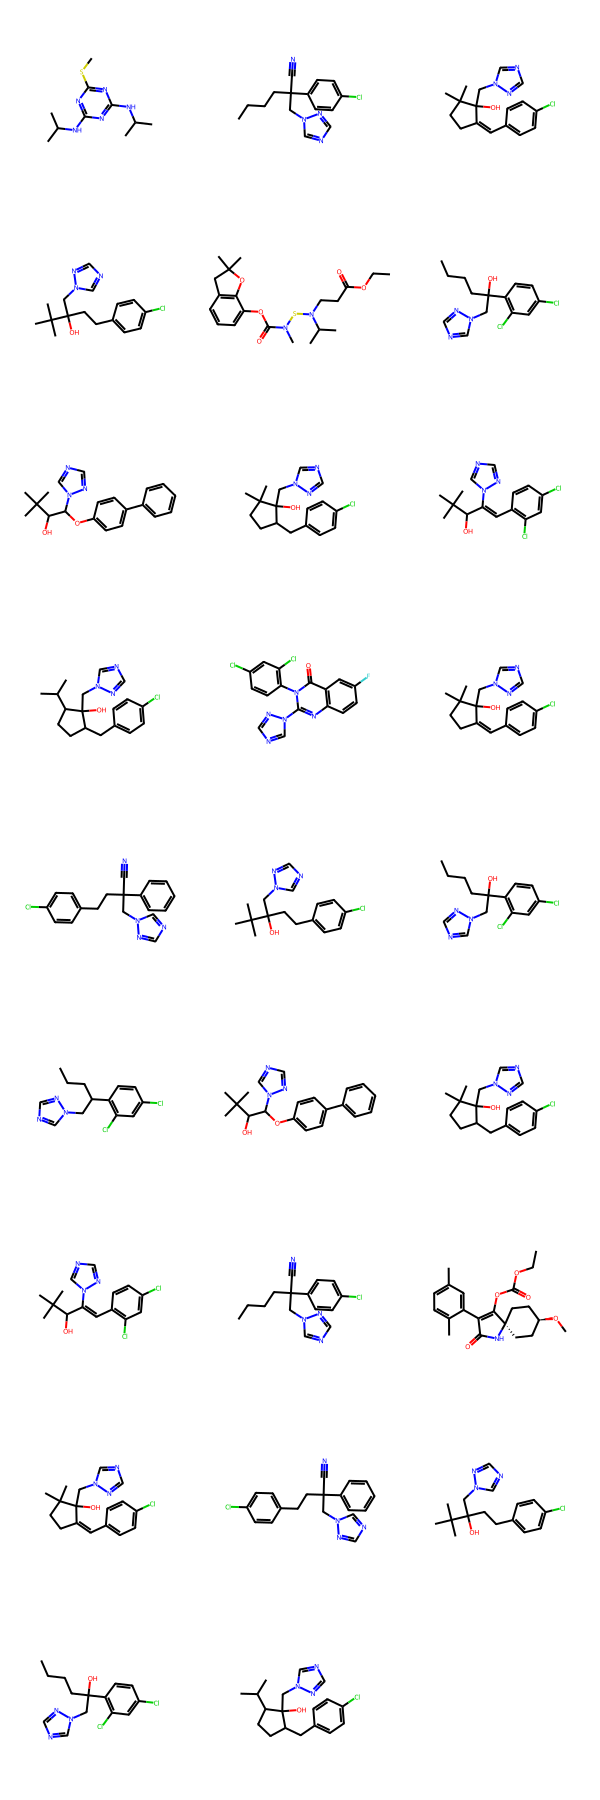

In [16]:
Draw.MolsToGridImage(mol_per_motif)

### to compare clusters you could use the tanimoto similarity for a binary motif fingerprint (not implemented yet) against another binary motif fingerprint

---

In [17]:
spectra_path_diffDB = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE.mgf"
spectra_path_diffDB = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-SCIEX-LIBRARY.mgf"

In [18]:
smiles_per_motifs_diffDB, predicted_motifs_diffDB = predict_with_lda(lda_model, spectra_path_diffDB, id2word)

66


In [19]:
annotated_motifs_diffDB = []
purities_maccs_diffDB = []
for smiles_per_motif in smiles_per_motifs_diffDB:
    annotated_motif, purity_maccs = annotate_motifs(smiles_per_motif)
    annotated_motifs_diffDB.append(annotated_motif)
    purities_maccs_diffDB.append(purity_maccs)

C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubstructureIdentification\scripts\notebooks\../programming_scripts\SMART_annotation.py:31: RuntimeWarning: invalid value encountered in divide
  purity_maccs = overlaped_maccs / compounds_per_motif


In [30]:
for motif_number, purity_maccs in enumerate(purities_maccs_diffDB):
    purity_maccs_nan = purity_maccs.copy()
    purity_maccs_nan[purity_maccs_nan == 0] = np.nan
    print(motif_number, len(smiles_per_motifs_diffDB[motif_number]),len(annotated_motifs_diffDB[motif_number]), np.nanmean(purity_maccs_nan))

0 0 0 nan
1 0 0 nan
2 0 0 nan
3 0 0 nan
4 0 0 nan
5 0 0 nan
6 0 0 nan
7 0 0 nan
8 0 0 nan
9 0 0 nan
10 0 0 nan
11 0 0 nan
12 0 0 nan
13 1 24 1.0
14 0 0 nan
15 1 35 1.0
16 0 0 nan
17 0 0 nan
18 0 0 nan
19 0 0 nan
20 0 0 nan
21 1 41 1.0
22 0 0 nan
23 0 0 nan
24 1 43 1.0
25 0 0 nan
26 1 41 1.0
27 0 0 nan
28 2 23 0.6619718309859155
29 1 78 1.0
30 2 24 0.7790697674418605
31 1 38 1.0
32 0 0 nan
33 1 33 1.0
34 5 13 0.49855072463768113
35 0 0 nan
36 2 20 0.6666666666666666
37 1 70 1.0
38 1 61 1.0
39 2 29 0.7416666666666667
40 1 39 1.0
41 1 59 1.0
42 5 3 0.4066666666666668
43 6 19 0.4793814432989692
44 2 24 0.6578947368421053
45 5 1 0.5220779220779221
46 4 0 0.38563829787234044
47 4 14 0.5194174757281553
48 6 14 0.4501718213058418
49 4 9 0.47023809523809523
50 5 14 0.5121951219512195
51 6 12 0.4158878504672896
52 4 2 0.4269230769230769
53 6 20 0.4814814814814815
54 12 12 0.3726851851851852
55 12 10 0.3573446327683615
56 3 21 0.6145833333333331
57 21 8 0.38430059523809523
58 9 5 0.34935897435897

C:\Users\dietr004\AppData\Local\Temp\ipykernel_32928\3576634217.py:4: RuntimeWarning: Mean of empty slice
  print(motif_number, len(smiles_per_motifs_diffDB[motif_number]),len(annotated_motifs_diffDB[motif_number]), np.nanmean(purity_maccs_nan))


In [22]:
motif_number = 45

In [23]:
len(annotated_motifs_diffDB[motif_number])

1

In [29]:
annotated_motifs_diffDB[motif_number]

['[#8]']

In [28]:
smiles_per_motifs_diffDB[motif_number]

['CCCCCCCC\\C=C/CCCCCCCC(O)=O',
 'CCCCCCCCCCCCCC(O)=O',
 'c1cc2c(cc1F)c(=O)n(c(n2)n3cncn3)c4ccc(cc4Cl)Cl',
 'CC(C)[C@H]1CC[C@H]([C@@]1(Cn2cncn2)O)Cc3ccc(cc3)Cl',
 'CC1(CCC(C1(Cn2cncn2)O)Cc3ccc(cc3)Cl)C']

In [26]:
mol_per_motif_diffDB = [Chem.MolFromSmiles(smiles) for smiles in smiles_per_motifs_diffDB[motif_number]]

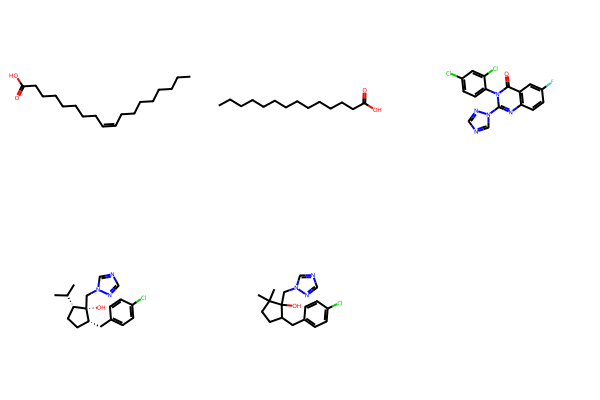

In [27]:
Draw.MolsToGridImage(mol_per_motif_diffDB)